# Credit Card Exploratory Data Analysis 

Author: Andrew Castillo

In this notebook we look to explore the data and see what insight we can gather from the potential groupings we see amongst the customers credit information. Multiple features are created and an inital analysis of some potential clusters is given. Please see down below for a detailed analysis. 

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('credit_card_data.csv')
df.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


In [3]:
#no missing values and all types are integers 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


In [4]:
df.columns

Index(['Sl_No', 'Customer Key', 'Avg_Credit_Limit', 'Total_Credit_Cards',
       'Total_visits_bank', 'Total_visits_online', 'Total_calls_made'],
      dtype='object')

In [5]:
#describe each feature for the bank 
features=['Avg_Credit_Limit', 'Total_Credit_Cards',
       'Total_visits_bank', 'Total_visits_online', 'Total_calls_made']
df[features].describe()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
count,660.000000,660.000000,660.000000,660.000000,660.000000
mean,34574.242424,4.706061,2.403030,2.606061,3.583333
std,37625.487804,2.167835,1.631813,2.935724,2.865317
min,3000.000000,1.000000,0.000000,0.000000,0.000000
25%,10000.000000,3.000000,1.000000,1.000000,1.000000
50%,18000.000000,5.000000,2.000000,2.000000,3.000000
75%,48000.000000,6.000000,4.000000,4.000000,5.000000
max,200000.000000,10.000000,5.000000,15.000000,10.000000


In [6]:
#get the correlation for each feature 
df[features].corr()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
Avg_Credit_Limit,1.000000,0.608860,-0.100312,0.551385,-0.414352
Total_Credit_Cards,0.608860,1.000000,0.315796,0.167758,-0.651251
Total_visits_bank,-0.100312,0.315796,1.000000,-0.551861,-0.506016
Total_visits_online,0.551385,0.167758,-0.551861,1.000000,0.127299
Total_calls_made,-0.414352,-0.651251,-0.506016,0.127299,1.000000


In [7]:
#generate some features to help gather more information 

#interactions with the bank 
df['interactions'] = df['Total_visits_bank'] + df['Total_visits_online'] + df['Total_calls_made']

#credit limit per credit card 
df['avg_credit_per_card']=df['Avg_Credit_Limit']/df['Total_Credit_Cards']

#credit per interaction 
df['avg_credit_per_interaction']=df['Avg_Credit_Limit']/df['interactions']


In [8]:
df.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,interactions,avg_credit_per_card,avg_credit_per_interaction
0,1,87073,100000,2,1,1,0,2,50000.000000,50000.000000
1,2,38414,50000,3,0,10,9,19,16666.666667,2631.578947
2,3,17341,50000,7,1,3,4,8,7142.857143,6250.000000
3,4,40496,30000,5,1,1,4,6,6000.000000,5000.000000
4,5,47437,100000,6,0,12,3,15,16666.666667,6666.666667


<Figure size 864x864 with 0 Axes>

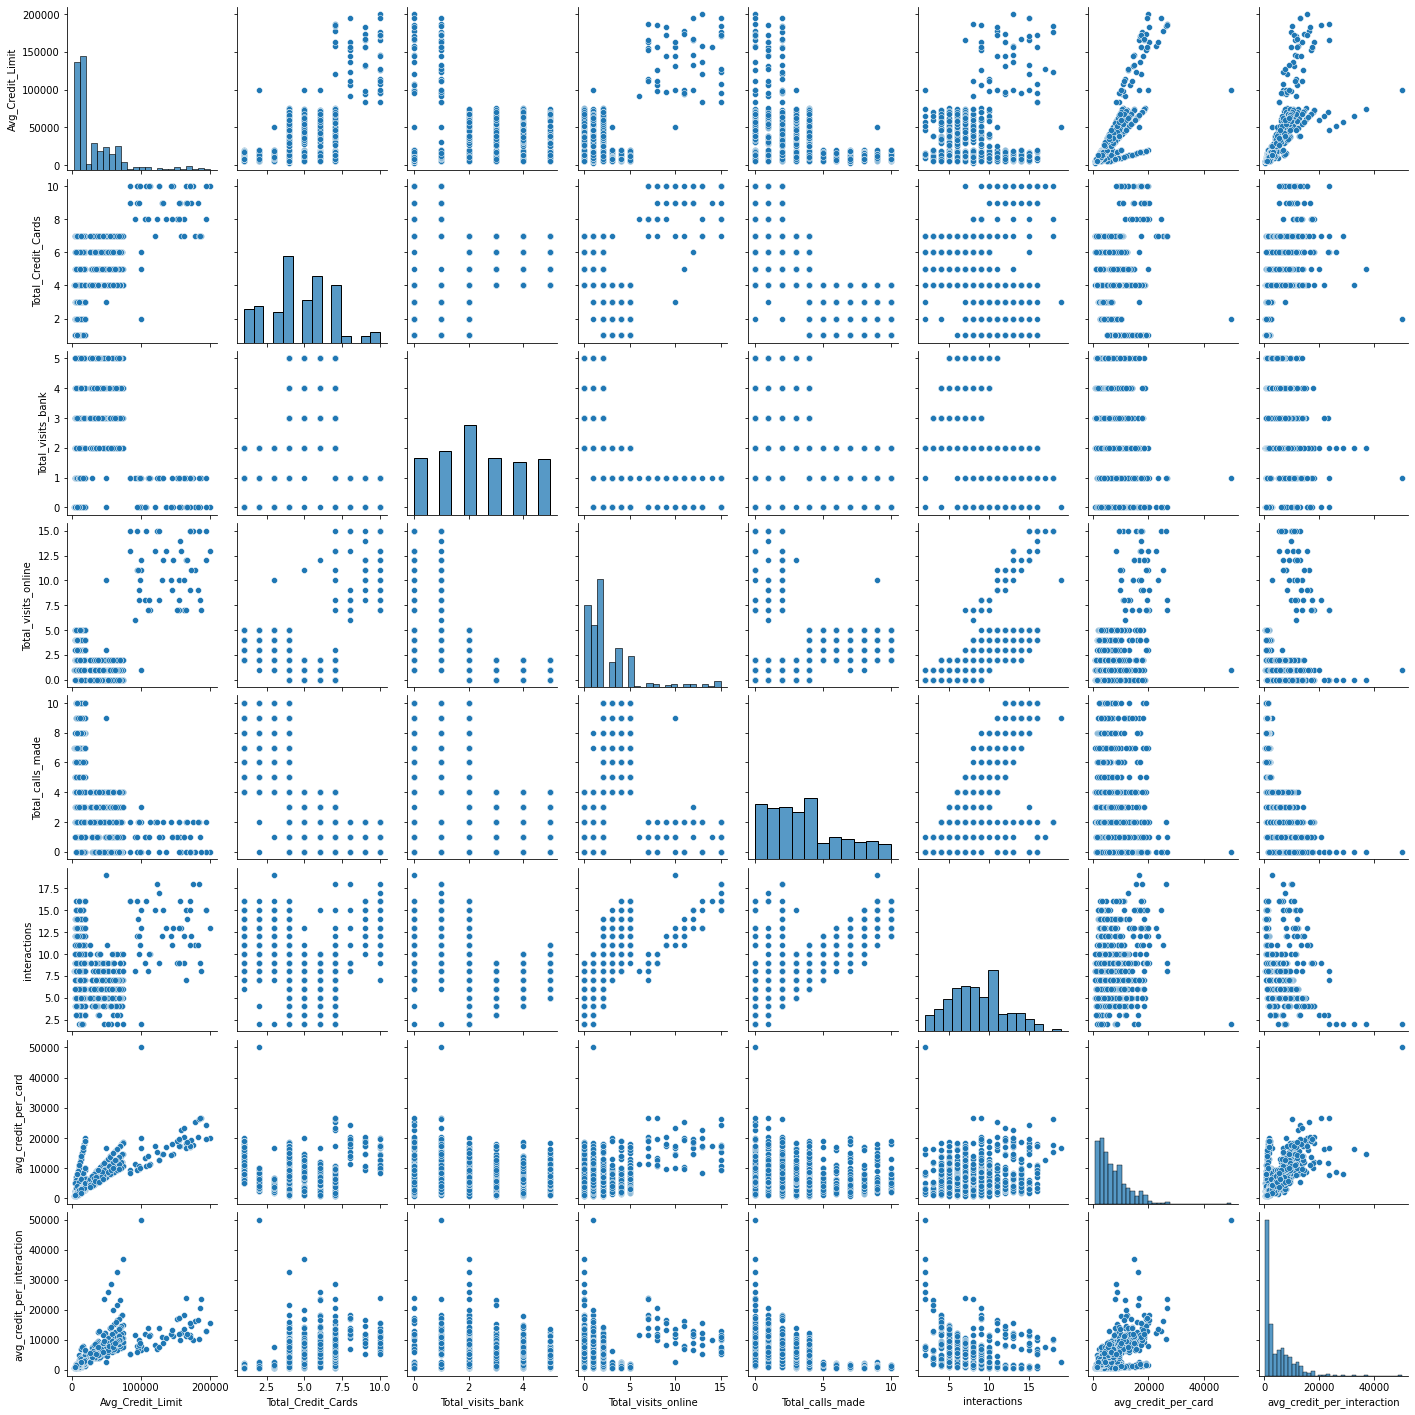

In [9]:
#create histograms and scatterplots to visualize the data 
#relating the average salary, to average size, and rating 
features=['Avg_Credit_Limit', 'Total_Credit_Cards',
       'Total_visits_bank', 'Total_visits_online', 'Total_calls_made', 'interactions', 'avg_credit_per_card', 
         'avg_credit_per_interaction']
plt.figure(figsize=(12,12))
sns.pairplot(df[features])
plt.show()

- Some points to consider:
    - People with more credit cards tend to have higher limits (less credit cards, less limits)
    - People that take more visits online tend to have higher credit limits. 
    - People with lower limits take more visits to the bank. 
    - Lower visits to the bank means higher visits online.

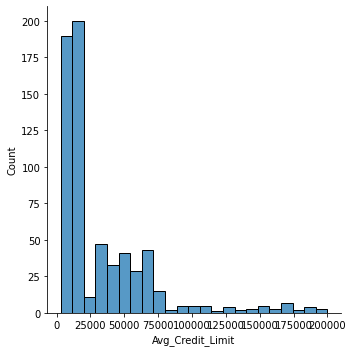

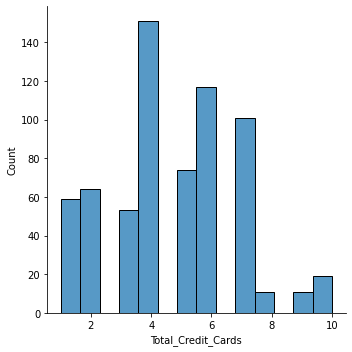

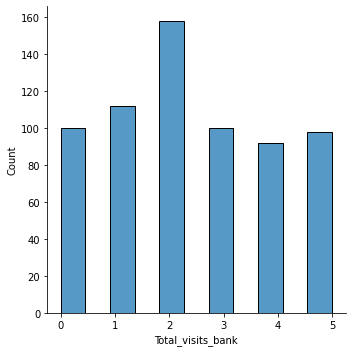

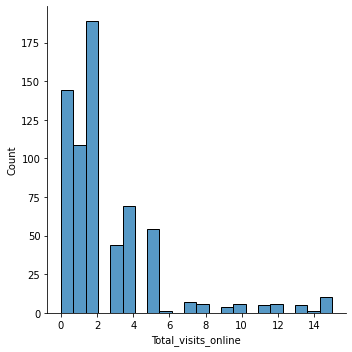

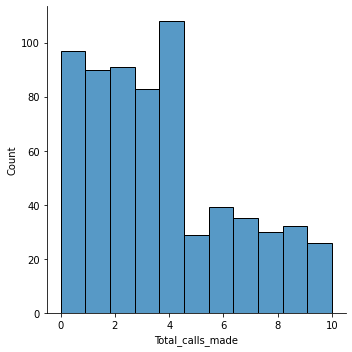

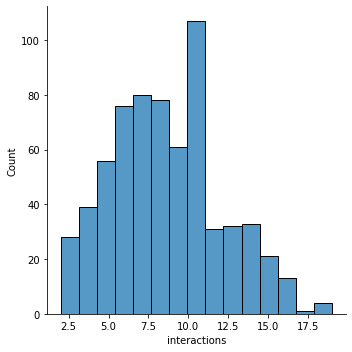

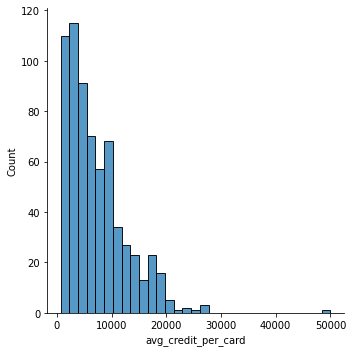

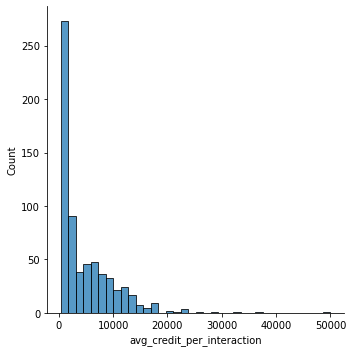

In [10]:
#take a closer look at the histograms 
for feature in features: 
    sns.displot(df[feature], kde=False)
    plt.show()
#features are definitely not normal so we may need to take that into consideration. 
#there are also large values so scaling will be necessary 

The scatterplots seem to show some type of separation, let's take a closer look at a few of them. 

In [11]:
#Be good to give the graph of each one and quickly describe any separation we see. 
#Could give evidence to the clusters 

In [12]:
#scatterplot function 
def scatter(x,y):
    plt.figure(figsize=(7,7))
    sns.scatterplot(data=df, x=x, y=y)
    plt.show()

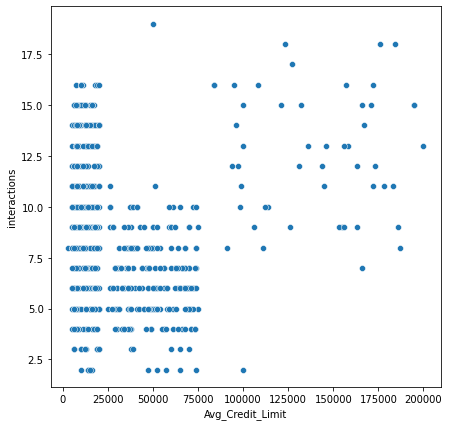

In [21]:
#credit limit and interactions
scatter('Avg_Credit_Limit', 'interactions')

From the above scatterplot we can see that those with credit limits less than 75000 tend to have more overall interactions. 

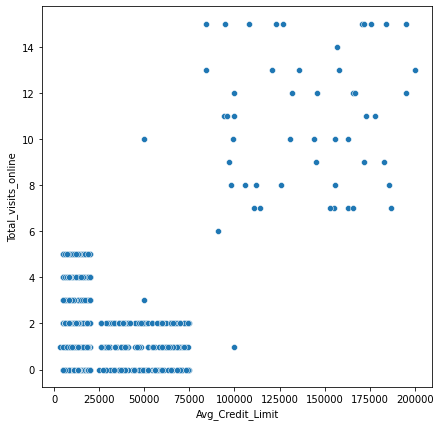

In [14]:
#credit limit and visits online
scatter('Avg_Credit_Limit', 'Total_visits_online')

From the above scatterplot, we can see that the two clusters above dictate that those who had credit limit less than ~75000 temd to have between 0 and 6 visits online. Those with higher limits had more visits online. 

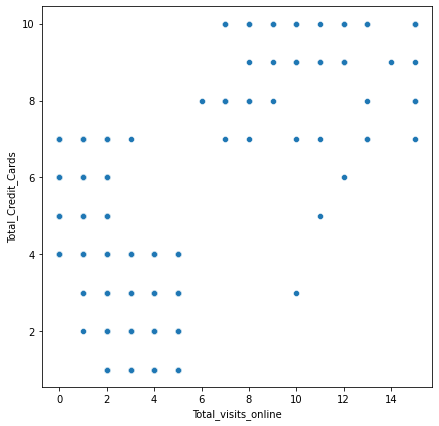

In [15]:
# visits online and number credit cards
scatter('Total_visits_online', 'Total_Credit_Cards')

We see two clusters again where those who had less than 6 visits online tendedn to have 0 to 7 credit cards while those who made more than 6 visits had more than 7. 

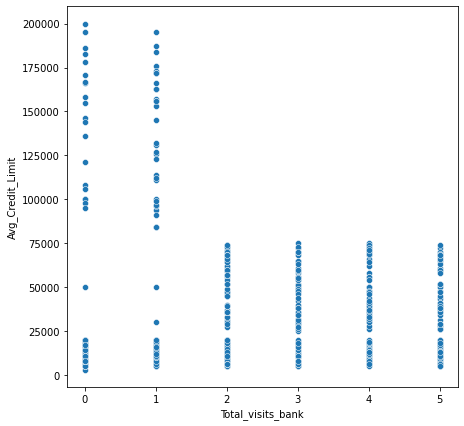

In [16]:
# credit limit and visits to bank 
scatter('Total_visits_bank', 'Avg_Credit_Limit')

The two clusters seen here show that those who have more than 75000 credit limit tended to make only 0 and 1 visits to the bank. Meanwhile those who had less than baout a 75000 limit made multiple visits to the bank. 

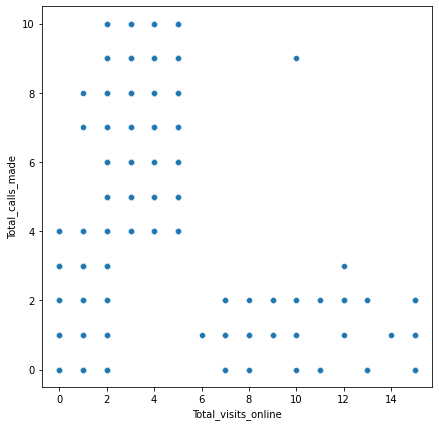

In [17]:
# total calls made and total visits online 
scatter('Total_visits_online', 'Total_calls_made',)

This scatterplot shows that when one makes less than 6 visits online, there tends to be between 0 and 10 calls made. While those who made more than 6 visits online had between 0 and 3 calls made. 

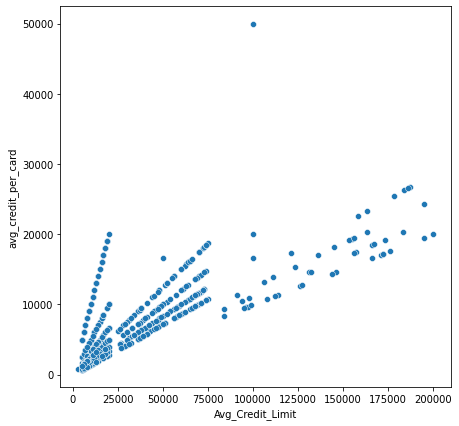

In [18]:
#avg credit and avg credit per card 
scatter('Avg_Credit_Limit', 'avg_credit_per_card')

These clusters show that the 75000 credit limit can be a marking point where those less than that limit have an average credit limit clustered between 0 and 20000 per card. 

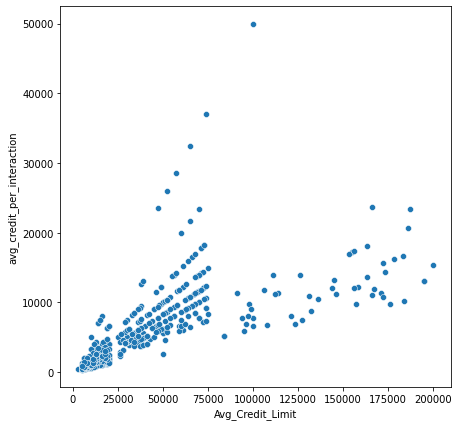

In [19]:
#avg credit and avg credit per interaction 
scatter('Avg_Credit_Limit', 'avg_credit_per_interaction')

Those who had less than 75000 had a credit limit per interaction clustered in the same way as in the previous diagram. The average credit per card and average credit per interaction seem to have the same formations on the cluster. 

In [23]:
df.to_csv('cluster_data.csv')

In [24]:
df

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,interactions,avg_credit_per_card,avg_credit_per_interaction
0,1,87073,100000,2,1,1,0,2,50000.000000,50000.000000
1,2,38414,50000,3,0,10,9,19,16666.666667,2631.578947
2,3,17341,50000,7,1,3,4,8,7142.857143,6250.000000
3,4,40496,30000,5,1,1,4,6,6000.000000,5000.000000
4,5,47437,100000,6,0,12,3,15,16666.666667,6666.666667
...,...,...,...,...,...,...,...,...,...,...
655,656,51108,99000,10,1,10,0,11,9900.000000,9000.000000
656,657,60732,84000,10,1,13,2,16,8400.000000,5250.000000
657,658,53834,145000,8,1,9,1,11,18125.000000,13181.818182
658,659,80655,172000,10,1,15,0,16,17200.000000,10750.000000
